In [70]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter

In [18]:
df = pd.read_csv(r'C:\Users\NITHI\Documents\AlterSYS\Dataset\e_diogram.csv')
df.head()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveat1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,1.000,name,1,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588,name,1,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000,name,1,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788,name,1,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571,name,1,0.0


In [23]:
print(df.isnull().sum())
print(df.shape)

survival                 3
alive                    2
age                      7
pericardialeffusion      1
fractionalshortening     9
epss                    16
lvdd                    12
wallmotion-score         5
wallmotion-index         3
mult                     4
name                     2
group                   23
aliveat1                58
dtype: int64
(133, 13)


In [24]:
df.tail()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveat1
128,7.5,1.0,64.0,0.0,0.24,12.9,4.72,12.0,1.000,0.857,name,NaN,NaN
129,41.0,0.0,64.0,0.0,0.28,5.4,5.47,11.0,1.100,0.714,name,NaN,NaN
130,36.0,0.0,69.0,0.0,0.20,7.0,5.05,14.5,1.210,0.857,name,NaN,NaN
131,22.0,0.0,57.0,0.0,0.14,16.1,4.36,15.0,1.360,0.786,name,NaN,NaN
132,20.0,0.0,62.0,0.0,0.15,0.0,4.51,15.5,1.409,0.786,name,NaN,NaN


In [52]:
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
COLUMNS = ['age', 'pericardialeffusion', 'fractionalshortening', 'epss', 'lvdd', 'wallmotion-score']
X = imp_mean.fit_transform(df[COLUMNS])
df_X = pd.DataFrame(X,columns=COLUMNS)
df_X.shape
print(df_X.tail())
print(df_X.isnull().sum())

      age  pericardialeffusion  fractionalshortening  epss  lvdd  \
128  64.0                  0.0                  0.24  12.9  4.72   
129  64.0                  0.0                  0.28   5.4  5.47   
130  69.0                  0.0                  0.20   7.0  5.05   
131  57.0                  0.0                  0.14  16.1  4.36   
132  62.0                  0.0                  0.15   0.0  4.51   

     wallmotion-score  
128              12.0  
129              11.0  
130              14.5  
131              15.0  
132              15.5  
age                     0
pericardialeffusion     0
fractionalshortening    0
epss                    0
lvdd                    0
wallmotion-score        0
dtype: int64


In [50]:
COLUMNS_keep = ['survival', 'alive']
df_keep = df[COLUMNS_keep]
df_keep.shape

(133, 2)

In [60]:
df = pd.concat([df_keep, df_X], axis = 1)
df = df.dropna()
print(df.isnull().sum())
print(df.shape)

survival                0
alive                   0
age                     0
pericardialeffusion     0
fractionalshortening    0
epss                    0
lvdd                    0
wallmotion-score        0
dtype: int64
(130, 8)


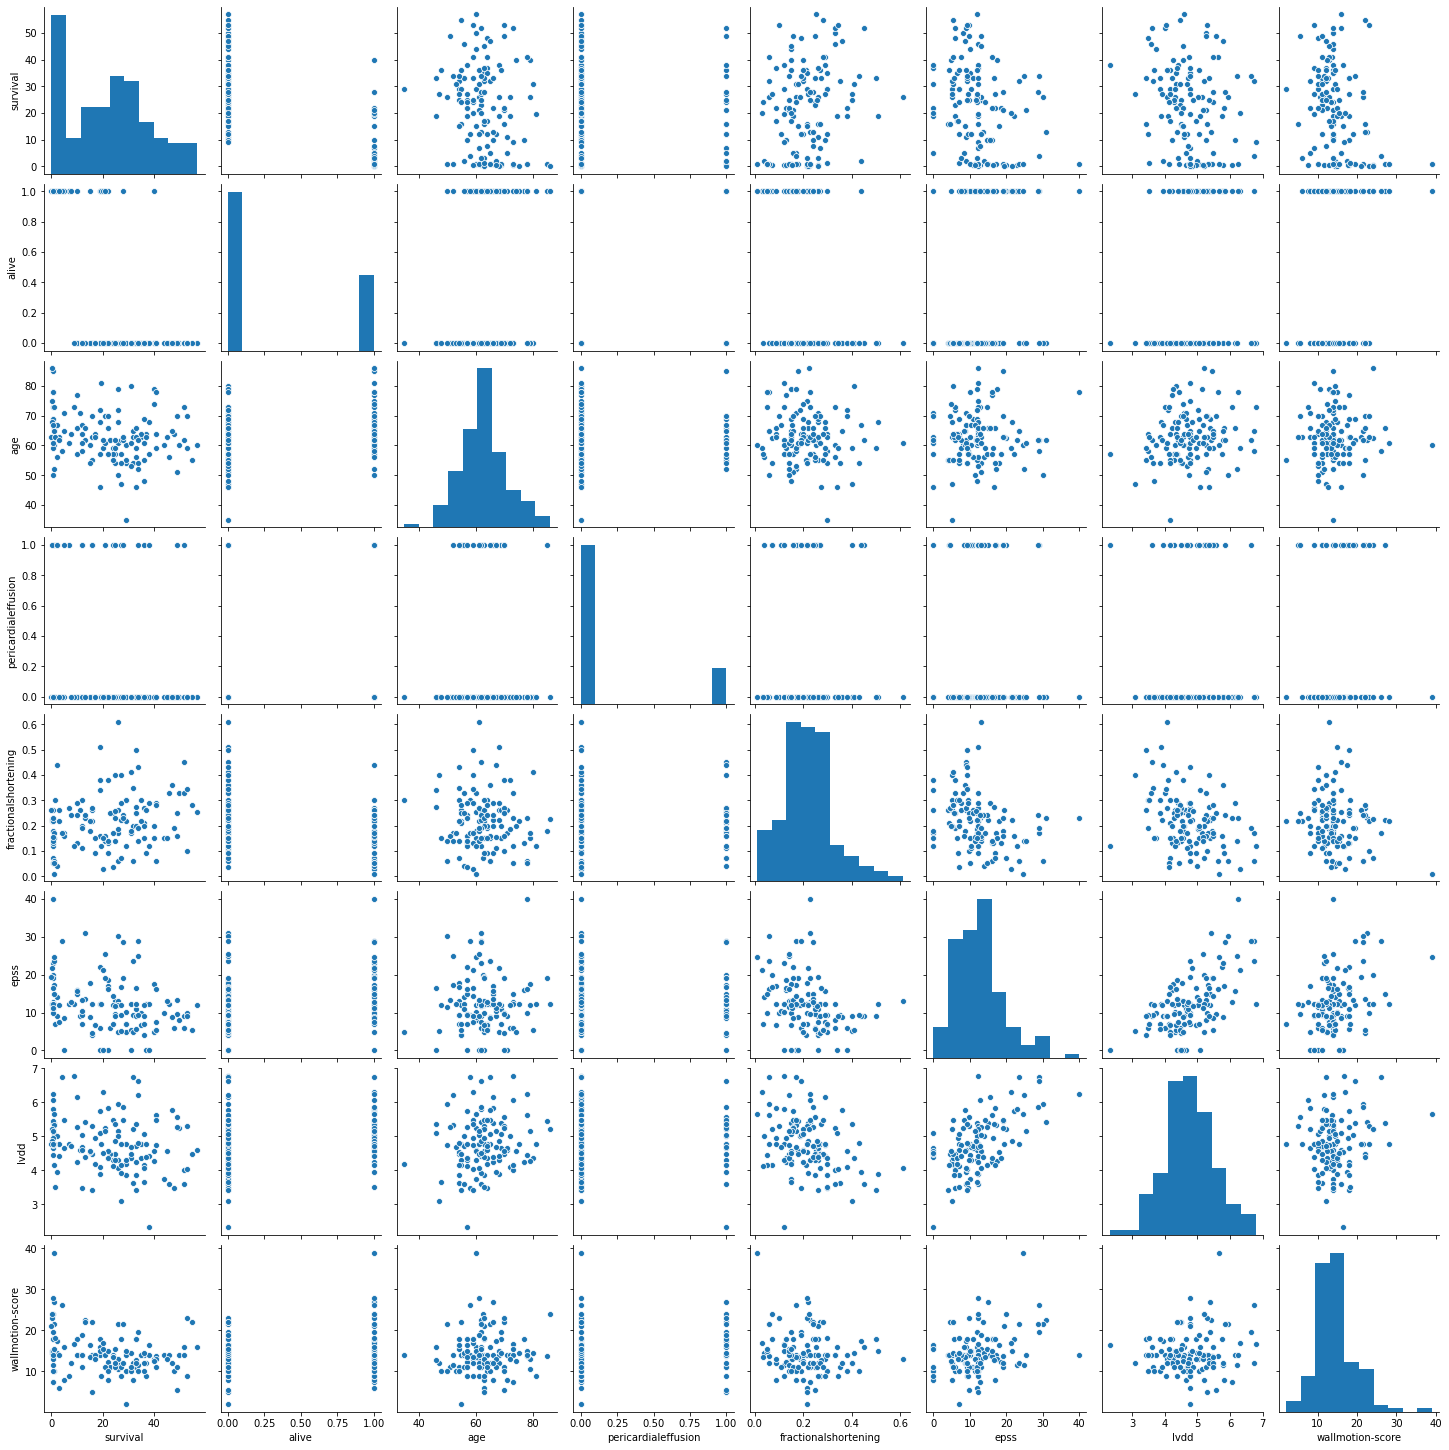

In [65]:
sns.pairplot(df)
[‘Age’,’Operation_Age’, ‘Axillary_Nodes’])

In [68]:
print(df.tail())
df.loc[df.alive == 1,'dead'] = 0
df.loc[df.alive == 0,'dead'] = 1
df.groupby('dead').count() # create a new column for annlysis

     survival  alive   age  pericardialeffusion  fractionalshortening  epss  \
128       7.5    1.0  64.0                  0.0                  0.24  12.9   
129      41.0    0.0  64.0                  0.0                  0.28   5.4   
130      36.0    0.0  69.0                  0.0                  0.20   7.0   
131      22.0    0.0  57.0                  0.0                  0.14  16.1   
132      20.0    0.0  62.0                  0.0                  0.15   0.0   

     lvdd  wallmotion-score  
128  4.72              12.0  
129  5.47              11.0  
130  5.05              14.5  
131  4.36              15.0  
132  4.51              15.5  


,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score
dead,,,,,,,,
0.0,42,42,42,42,42,42,42,42
1.0,88,88,88,88,88,88,88,88


In [74]:
#we will pridit with kaplan meier essimates
kmf = KaplanMeierFitter()
T = df['survival']
E = df['dead']
kmf.fit(T, event_observed = E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 130 total observations, 42 right-censored observations>

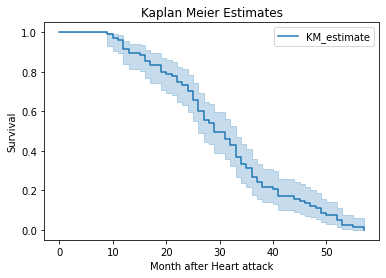

In [78]:
kmf.plot()
plt.title('Kaplan Meier Estimates')
plt.xlabel('Month after Heart attack')
plt.ylabel('Survival')
plt.show()

In [80]:
import statistics
print(statistics.median(df['age']))
print(statistics.median(df['wallmotion-score']))

62.2645
14.0


In [85]:
print(kmf.survival_function_)

          KM_estimate
timeline             
0.00         1.000000
0.03         1.000000
0.25         1.000000
0.50         1.000000
0.75         1.000000
1.00         1.000000
1.25         1.000000
2.00         1.000000
3.00         1.000000
4.00         1.000000
5.00         1.000000
7.00         1.000000
7.50         1.000000
9.00         0.989691
10.00        0.969072
11.00        0.958652
12.00        0.916972
13.00        0.896131
15.00        0.885711
16.00        0.854079
17.00        0.832990
19.00        0.801358
19.50        0.801358
20.00        0.790529
21.00        0.779549
22.00        0.746140
23.00        0.734835
24.00        0.700919
25.00        0.655699
26.00        0.599173
27.00        0.553952
28.00        0.542647
29.00        0.496464
31.00        0.461827
32.00        0.427190
33.00        0.369462
34.00        0.334825
35.00        0.311733
36.00        0.265551
37.00        0.242459
38.00        0.219368
40.00        0.207822
41.00        0.171148
44.00     

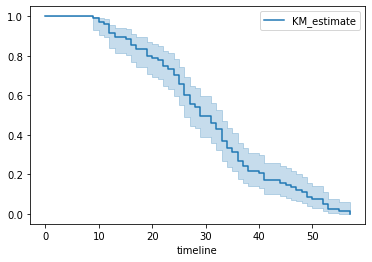

In [86]:
kmf.survival_function_
kmf.cumulative_density_
kmf.plot_survival_function()

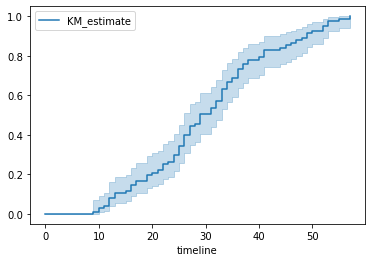

In [87]:
kmf.plot_cumulative_density()

In [92]:
print(kmf.cumulative_density_)

          KM_estimate
timeline             
0.00         0.000000
0.03         0.000000
0.25         0.000000
0.50         0.000000
0.75         0.000000
1.00         0.000000
1.25         0.000000
2.00         0.000000
3.00         0.000000
4.00         0.000000
5.00         0.000000
7.00         0.000000
7.50         0.000000
9.00         0.010309
10.00        0.030928
11.00        0.041348
12.00        0.083028
13.00        0.103869
15.00        0.114289
16.00        0.145921
17.00        0.167010
19.00        0.198642
19.50        0.198642
20.00        0.209471
21.00        0.220451
22.00        0.253860
23.00        0.265165
24.00        0.299081
25.00        0.344301
26.00        0.400827
27.00        0.446048
28.00        0.457353
29.00        0.503536
31.00        0.538173
32.00        0.572810
33.00        0.630538
34.00        0.665175
35.00        0.688267
36.00        0.734449
37.00        0.757541
38.00        0.780632
40.00        0.792178
41.00        0.828852
44.00     

In [97]:
from lifelines.utils import median_survival_times

median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)

In [98]:
print( kmf.median_survival_time_)
print(median_confidence_interval_)

30.0
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                    26.0                    34.0


Text(0, 0.5, 'Survival')

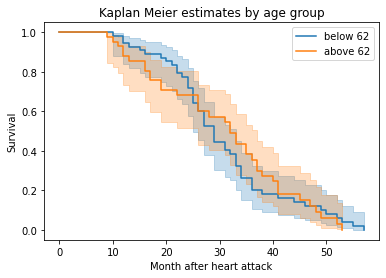

In [116]:
#based on age
age_group =  df['age']< statistics.median(df['age'])
ax = plt.subplot(111)
kmf.fit(T[age_group], event_observed = E[age_group], label= 'below 62')
kmf.plot(ax = ax)
kmf.fit(T[~age_group], event_observed = E[~age_group], label = 'above 62')
kmf.plot(ax = ax)
plt.title('Kaplan Meier estimates by age group')
plt.xlabel('Month after heart attack')
plt.ylabel("Survival")

Text(0, 0.5, 'Survival')

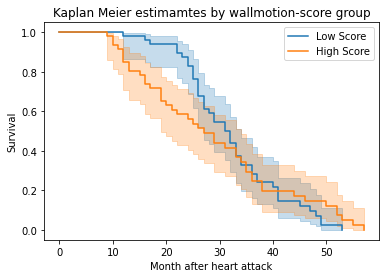

In [120]:
#based on wallmotion-score
score_group = df['wallmotion-score'] < statistics.median(df['wallmotion-score'])
ax =plt.subplot(111)
kmf.fit(T[score_group], event_observed = E[score_group], label = 'Low Score')
kmf.plot(ax=ax)
kmf.fit(T[~score_group],event_observed = E[~score_group], label= 'High Score')
kmf.plot(ax = ax)
plt.title('Kaplan Meier estimamtes by wallmotion-score group')
plt.xlabel('Month after heart attack')
plt.ylabel('Survival')

## Cox proportional hazards model

In [140]:
from lifelines.statistics import logrank_test
month_cut = 24
df.loc[(df.dead == 1) & (df.survival <= month_cut), 'censored'] = 1
df.loc[(df.dead == 1) & (df.survival > month_cut), 'censored'] = 0
df.loc[df.dead == 0, 'censored'] = 0
# E_v2 = df['censored']
# T_low = T[score_group]
# T_high = T[~score_group]
# E_low = E_v2[score_group]
# E_high = E_v2[~score_group]

# results = logrank_test(T_low, T_high, event_observed_A = E_low, event_observed_B = E_high)
# results.print_summary()

In [141]:
cph = CoxPHFitter()
df_scrore_group = pd.DataFrame(score_group)
df_model = df[['survival', 'censored', 'age']]
df_model = pd.concat([df_model, df_scrore_group], axis = 1)
cph.fit(df_model, 'survival', 'censored')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 130 total observations, 102 right-censored observations>
             duration col = 'survival'
                event col = 'censored'
      baseline estimation = breslow
   number of observations = 130
number of events observed = 28
   partial log-likelihood = -117.36
         time fit was run = 2021-01-24 11:04:34 UTC

---
                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                
age                0.02       1.02       0.02            -0.03             0.07                 0.97                 1.07
wallmotion-score  -1.27       0.28       0.42            -2.09            -0.45                 0.12                 0.64

                     z      p   -log2(p)
covariate                               
age               0.88   0.38       1.39
wallmotion-score -3.02 <0.005       8.63
---
Concordance = 0.70
Partial AIC = 238.71
log-likelihood ratio test = 10.68 on 2 df
-log2(p) of ll-ratio test = 7.71